In [2]:
%load_ext autoreload
%autoreload 2


In [3]:

from lib.common.mlm_singleton import init_singleton_scorer
mlm_scorer = init_singleton_scorer('roberta-large')


In [62]:

from pathlib import Path
from data_config import Exp4NPN
from dataclasses import dataclass
from typing import List, Dict


@dataclass
class NPN_config:
    judgement_filter: bool
    gpt_outputs_file: Path
    acceptability_ratings_file: Path
    save_name: str
    output_has_noun_rep: bool = False

# was for original data
# # todo(NC): this has a problem (but maybe doesn't matter bc we don't need)
# config_v1 = NPN_config(
#     judgement_filter=True,
#     gpt_outputs_file=Exp4NPN.npn_gpt_outputs,
#     acceptability_ratings_file=Exp4NPN.npn_acceptability_ratings_csv,
#     save_name="npn_v1",
#     output_has_noun_rep=True
# )

config_v2 = NPN_config(
    judgement_filter=True,
    gpt_outputs_file=Exp4NPN.npn_gpt_outputs_v2_fixed,
    acceptability_ratings_file=Exp4NPN.npn_acceptability_v2,
    save_name="npn_v2",
)

config_v3 = NPN_config(
    # judgement_filter=True,
    judgement_filter=True,
    gpt_outputs_file=Exp4NPN.npn_gpt_outputs_v3_zero_freq,
    acceptability_ratings_file=Exp4NPN.npn_acceptability_v3,
    save_name="npn_v3"
)

# change for each data run
config = config_v3
infinigram_filter = False


In [63]:

from paper.exp4_npn.exp6_npn_infinigram import load_dict_from_file
from proj_common.npn_dataset_generation.npn_utils import GPTOutput
from proj_common.npns.npns import get_npn_data, count_by_prep, compute_scores

all_npns: List[GPTOutput] = get_npn_data(
    config.gpt_outputs_file,
    npn_judgement_file = config.acceptability_ratings_file if config.judgement_filter else None,
    min_acceptability=4 if config.judgement_filter else None,
    output_has_noun_rep=config.output_has_noun_rep,
    do_filter_gpt_generations=True
)

def filter_infinigram(npns: List[GPTOutput]):
    # filter infinigram, maybe
    freqs = load_dict_from_file(Exp4NPN.npn_roberta_infinigram)
    final_npns = [x for x in npns if freqs[x.npn] == 0]
    return final_npns

# if we want infinigram filter
if infinigram_filter:
    all_npns = filter_infinigram(all_npns)
    print(f"after infingram filter: {len(all_npns)}")



print("all npns after all filters")
count_by_prep(all_npns)


reading from gpt_output_file - before filtering 364
notify (non error): more than 2 occurrences! maternity As a maternity nurse, she experienced the joy and struggle of new life, maternity upon maternity, and it only strengthened her passion for her job. 

notify (non error): more than 2 occurrences! despite Despite after despite, she continued to pursue her dreams with unwavering determination. 

In filter outputs, printing filtered
For the preposition category, it's count where desired NPN string did not occur
Counter()
after filtering (did filter = True), 364
364
removed Counter({'rating_to': 59, 'rating_by': 57, 'rating_upon': 40, 'rating_after': 37})
totals after remove Counter({'after': 54, 'upon': 51, 'by': 34, 'to': 32})
all npns after all filters
Counter({'after': 54, 'upon': 51, 'by': 34, 'to': 32})


In [56]:
scores, ct_err, ct_multi, results = compute_scores(
    all_npns,
    allow_case_mismatch=True
)

0 0


In [57]:
from pprint import pp
pp(scores)

defaultdict(<class 'list'>,
            {'upon': [0.9998530149459839,
                      0.9999194145202637,
                      0.9982773065567017,
                      0.9913197159767151,
                      0.9979408383369446,
                      0.9968550205230713,
                      0.9973353743553162,
                      0.9974647760391235,
                      0.9991853833198547,
                      0.9993333220481873,
                      0.9986741542816162,
                      0.9978411197662354,
                      0.9927706122398376,
                      0.9934834837913513,
                      0.9977916479110718,
                      0.9977812170982361,
                      0.9979536533355713,
                      0.9973137974739075,
                      0.9997945427894592,
                      0.9998801946640015,
                      0.9694421291351318,
                      0.9953426122665405,
                      0.9933700561523438,
      

In [58]:

import matplotlib.pyplot as plt
import seaborn as sns


counts
upon 68
by 28
after 30
to 2
128


/var/folders/58/nkm5hbs97tz3vc0x5l5zl4w40000gn/T/ipykernel_55117/431968811.py:43: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cats_prettied, y=values, ax=ax,inner='quartile', cut=0, edgecolor="black",saturation=0.1, scale="width")
/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/rozlib-python/rozlib/libs/plotting/utils_latex_matplot.py:44: UserWarning: /Library/TeX/textbin will be added to path
  warnings.warn(f"/Library/TeX/textbin will be added to path")


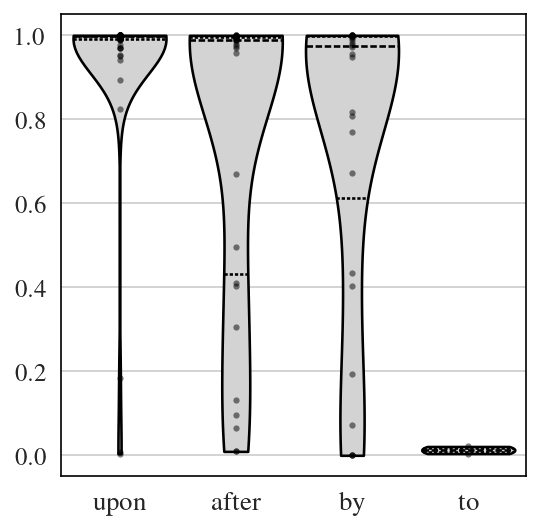

In [61]:

from rozlib.libs.plotting.utils_latex_matplot import config_matplot_for_latex
from lib.utils.utils_misc import save_fig

"""
Produce boxplot for all
"""


config_matplot_for_latex(13)

print('counts')
for k in scores.keys():
    print(k, len(scores[k]))

fig, ax = plt.subplots(figsize=(4,4))
ax.set_ylim(-.05, 1.05)
# ax.set_title("Distribution of contextual probabilities for noun in NPN")
# ax.set_ylabel("Contextual Probability for Noun")
# ax.set_xlabel("Preposition in NPN")
# plt.rcParams.update({
#     # 'text.usetex': True,
#     'font.family': 'serif',  # Change to 'sans-serif', 'monospace', etc.
#     'font.serif': ["cm"],
#     'font.size': 10,         # Adjust font size
# })
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set dark color (or 'white' for light mode)
    # spine.set_linewidth(2)        # Adjust border thickness
# plt.xlabel("Construction & Word")
# categories, values = zip(*[(key, val) for key, vals in all_aggregated.items() for val in vals])

cat_val_tuples = [(key, val) for key, vals in scores.items() for val in vals]
order = ['upon', 'after','by', 'to']
cat_val_tuples_sorted = sorted(cat_val_tuples, key=lambda x: order.index(x[0]))
categories, values = zip(*cat_val_tuples_sorted)
print(len(values))


# for two cats
cats_prettied = categories

# sns.boxplot(x=cats_prettied, y=values)
sns.violinplot(x=cats_prettied, y=values, ax=ax,inner='quartile', cut=0, edgecolor="black",saturation=0.1, scale="width")
# Overlay Data Points (Jittered for Visibility)
for violin in ax.collections:
    violin.set_facecolor("lightgray")
sns.stripplot(x=cats_prettied, y=values, ax=ax,
              color="black", alpha=0.5, size=3, jitter=False)  # Adjust size & alpha

# config_matplot_for_latex(14)
# save_fig(fig, "npn_acceptable.pdf")

if infinigram_filter:
    base_name = config.save_name + "inf_filter"
else:
    base_name = config.save_name

if config.judgement_filter:
    output_name = base_name + "_acceptable.pdf"
else:
    output_name = base_name + "_all.pdf"

config_matplot_for_latex(12)
save_fig(fig, output_name)


